# Задание
Построить модель машинного обучения, позволяющую предсказать, является ли цветок цветком класса Ирис-Вирджиния или нет.

План решения:

1. Из библиотеки scikit-learn подгрузите данные. Мы уже работали с ними в рамках Темы 1.

2. Сформируйте новое поле target_virginica, которое будет равно из 0, если цветок не является классом 2, иначе  — 1. Убедитесь, что разметка выполнена корректно, рассчитав количество объектов каждого класса по новой целевой переменной target_virginica.

3. Обучите библиотечную модель логистической регрессии на обучающей части данных.

4. Оцените качество модели, выведя матрицу ошибок для прогнозов обученной моделью на тестовой части данных.

5. Сконструируйте свой класс MyLogisticRegression, решающий задачу логистической регрессии методом градиентного спуска.

    a. Он должен инициализироваться величиной шага градиентного спуска и количеством итераций градиентного спуска.

    b. Должен содержать метод fit для обучения модели, на вход которой будут подаваться обучающие данные. Чтобы реализовать функцию sigmoid, можно воспользоваться библиотечной функцией np.exp. Для расчета градиента необходимо использовать формулу, приведенную в курсе в блоке «Логистическая регрессия для решения задачи бинарной классификации».

    c. Должен содержаться метод predict, который будет возвращать лейбл 0/1. Лейбл должен рассчитываться из вероятности принадлежности классу 1. Вероятность должна рассчитываться как сигмоида от результата произведения матрицы фичей X и вектора весов модели w.

6. Оцените качество модели, выведя матрицу ошибок для прогнозов обученной моделью на тестовой части данных.

7. Подберите такие параметры градиентного спуска, чтобы разделение получилось не хуже, чем у библиотечной модели.

In [1]:
# Для начала импорт все нужный пакетов
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import mean_absolute_error, mean_squared_error, ConfusionMatrixDisplay, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [2]:
df = load_iris(as_frame=True) 

**Информация о данных ириса**

In [3]:
print(df.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
df = load_iris(as_frame=True).frame

In [5]:
df.info() # просматриваем общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [6]:
df.target.value_counts() # просамтрием количество значений принадлежащих к тому или иному классу

0    50
1    50
2    50
Name: target, dtype: int64

Создаем столбец target_virginica, в котором строка будет равна 0, если значение не равно 2, иначе  1

In [7]:
df['target_virginica'] = df.target.apply(lambda x: 0 if x != 2 else 1)

In [8]:
# Проверяем
df['target_virginica'].value_counts() 

0    100
1     50
Name: target_virginica, dtype: int64

In [9]:
# определение переменных-предикторов и переменной ответа
X = df.loc[:, (df.columns != 'target') & (df.columns != 'target_virginica')]
y = df['target_virginica']

In [10]:
# разделение набора данных на обучающий (70%) и тестовые (30%) наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
model = LogisticRegression()

# тренировка модели с использованием обучающих данных
model.fit(X_train,y_train)

# используем модель для составления прогнозов на основе тестовых данных
y_pred = model.predict(X_test)

# Выведем матрицу ошибок

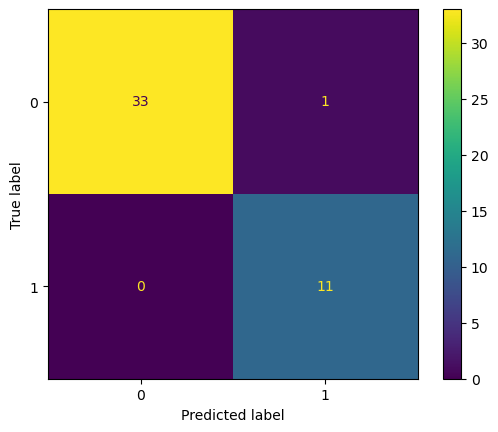

In [12]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

# Напишем свой класс MyLogisticRegression, решающий задачу логистической регрессии методом градиентного спуска.

In [13]:
class MyLogisticRegression: 
    """Класс, реализующий логистическую регрессию методом градиентного спуска"""
    
    def __init__(self, alpha=0.1, n_iterations=10000):
        """Конструктор класса.
           alpha: величина шага градиентного спуска
           n_iterations: количество итераций градиентного спуска"""
        self.alpha = alpha
        self.n_iterations = n_iterations

    def sigmoid(self, z):
        """Функция, реализующая сигмоиду"""
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """Метод для обучения модели"""
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
    
        for i in range(self.n_iterations):
            z = np.dot(X, self.weights)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / n_samples
            self.weights -= self.alpha * gradient

    def predict(self, X):
        """Метод для предсказания лейблов"""
        z = np.dot(X, self.weights)
        h = self.sigmoid(z)
        return np.round(h)

# Протестируем наш класс

In [14]:
my_model = MyLogisticRegression()

# тренировка модели с использованием обучающих данных
my_model.fit(X_train,y_train)

# используем модель для составления прогнозов на основе тестовых данных
my_y_pred = my_model.predict(X_test)

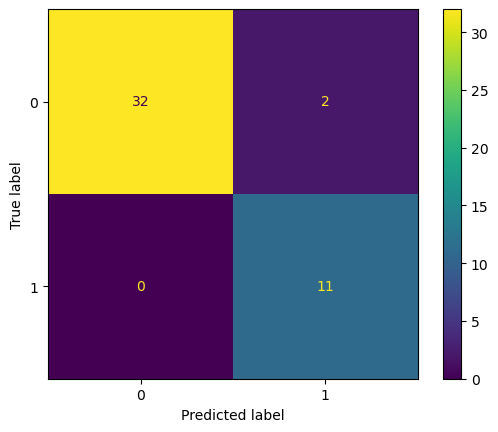

In [15]:
ConfusionMatrixDisplay(confusion_matrix(y_test, my_y_pred)).plot()

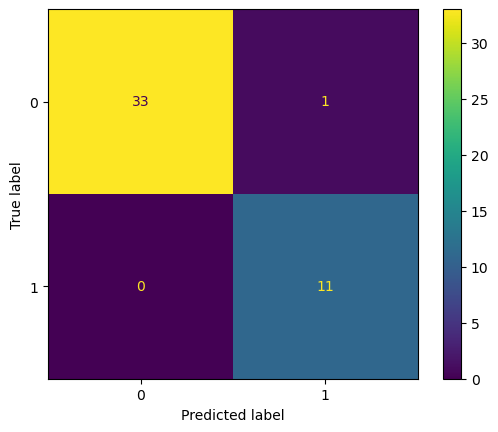

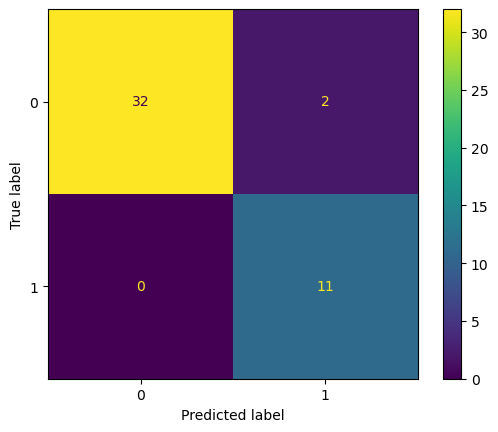

In [16]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot() # Логистическая регрессия библиотечная
ConfusionMatrixDisplay(confusion_matrix(y_test, my_y_pred)).plot() # "Кустарная" логистическая регрессия

**Вывод** ☝️ Сверху тренированная модель библиотекой, а ниже резултат матрицы ошибок уже нашего класса, результаты достаточно близки

Задача выполнена